<a href="https://colab.research.google.com/github/GalynaDe/ML/blob/main/HW_2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [224]:
!jupyter nbconvert --to script "/content/drive/MyDrive/ML course 2024/HW 2.3/process_bank_churn.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/ML course 2024/HW 2.3/process_bank_churn.ipynb to script
[NbConvertApp] Writing 6559 bytes to /content/drive/MyDrive/ML course 2024/HW 2.3/process_bank_churn.py


In [225]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

# Конвертация Jupyter Notebook в Python файл
!jupyter nbconvert --to script process_bank_churn.ipynb

# Импортируйте модуль после конверсии
import process_bank_churn
from process_bank_churn import preprocess_data

# Дополнительный код для работы с вашими данными

[NbConvertApp] WARNING | pattern 'process_bank_churn.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec

In [226]:
raw_df =pd.read_csv("drive/MyDrive/ML course 2024/HW 2.2/train.csv")
X_train, train_targets, X_val, val_targets, input_cols, scaler, encoder = preprocess_data(raw_df)

In [227]:
raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [228]:
from sklearn.tree import DecisionTreeClassifier

In [229]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [230]:
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix

def get_auroc(model, inputs, targets):
    preds = model.predict_proba(inputs)[:, 1]
    fpr, tpr, _ = roc_curve(targets, preds)
    return auc(fpr, tpr)


def get_metrics(model, inputs, targets, name='', print_f1=False, plot_matrix=False):
    preds = model.predict(inputs)

    if print_f1:
      print(f"F1-score: {f1_score(targets, preds):.2f}")

    roc_auc = get_auroc(model, inputs, targets)
    print(f"ROC AUC: {roc_auc:.2f}")

    if plot_matrix:
      cf = confusion_matrix(targets, preds, normalize='true')
      plt.figure()
      sns.heatmap(cf, annot=True, cmap='Blues')
      plt.xlabel('Prediction')
      plt.ylabel('Target')
      plt.title('{} Confusion Matrix'.format(name))

ROC AUC: 1.00


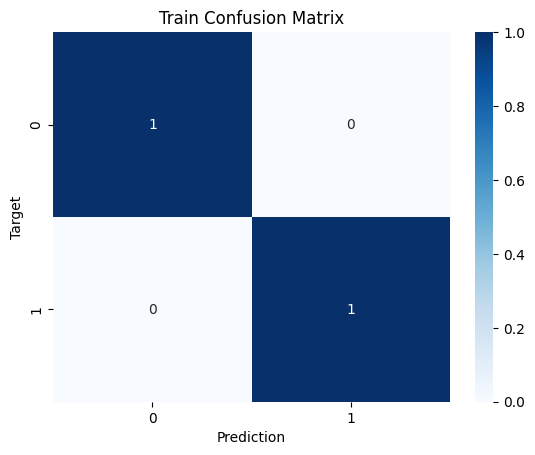

In [231]:
get_metrics(model, X_train, train_targets, 'Train', plot_matrix=True)

ROC AUC: 0.78


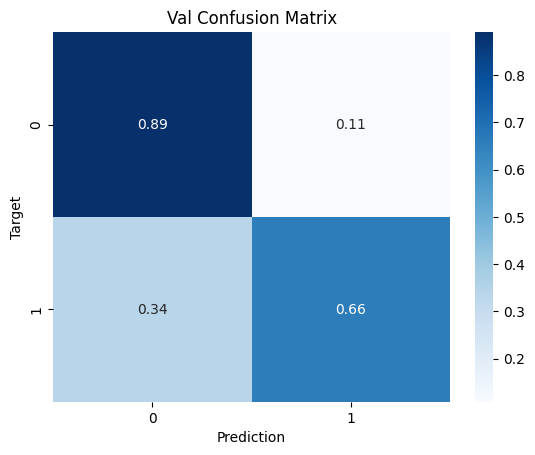

In [232]:
get_metrics(model, X_val, val_targets, 'Val', plot_matrix=True)

[Text(0.5, 0.875, 'Age <= 0.455\ngini = 0.324\nsamples = 12000\nvalue = [9558, 2442]'),
 Text(0.25, 0.625, 'NumOfProducts <= 0.167\ngini = 0.188\nsamples = 9661\nvalue = [8647, 1014]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Age <= 0.384\ngini = 0.341\nsamples = 3664\nvalue = [2866, 798]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'NumOfProducts <= 0.5\ngini = 0.069\nsamples = 5997\nvalue = [5781, 216]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'NumOfProducts <= 0.167\ngini = 0.476\nsamples = 2339\nvalue = [911, 1428]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'IsActiveMember <= 0.5\ngini = 0.343\nsamples = 1481\nvalue = [325, 1156]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'NumOfProducts <= 0.5\ngini = 0.433\nsamples = 858\nvalue = [586, 272]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.

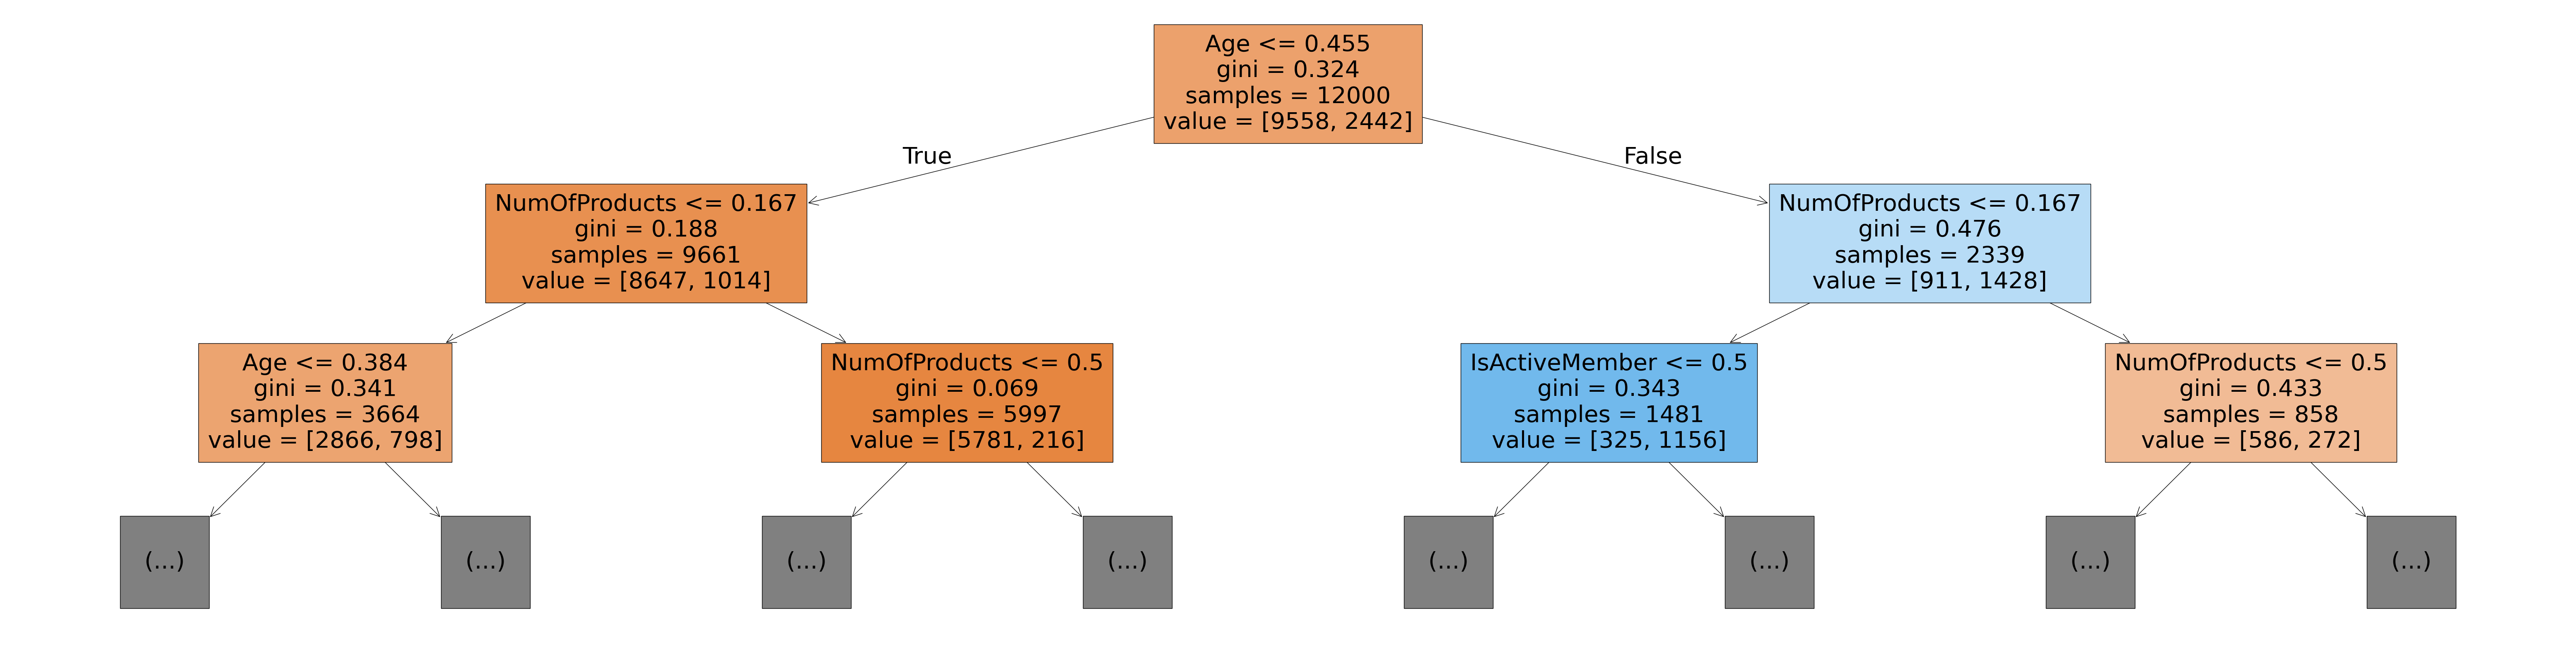

In [233]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)

Бачимо, що найвпливовіші ознаки- Age, NumOfProducts, IsActiveMember.

In [234]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

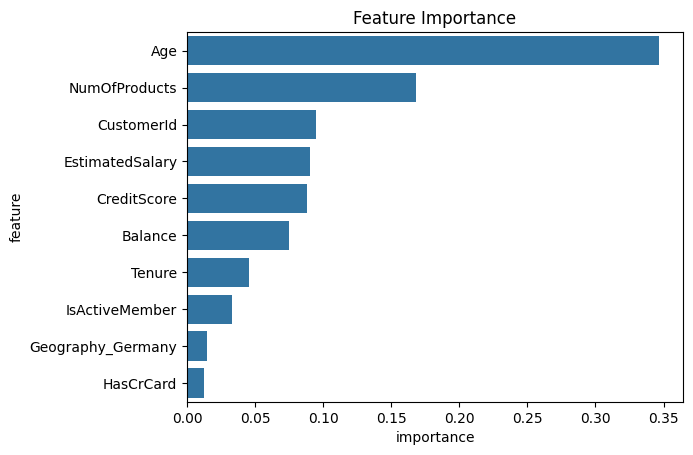

In [235]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [236]:
model = DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)

In [238]:
get_metrics(model, X_train, train_targets, 'Train')

ROC AUC: 0.92


In [239]:
get_metrics(model, X_val, val_targets, 'Val')

ROC AUC: 0.92


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [240]:
def max_depth_auroc(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_auroc = get_auroc(model, X_train, train_targets)
    val_auroc = get_auroc(model, X_val, val_targets)
    return {'Max Depth': md, 'Training AUROC': train_auroc, 'Validation AUROC': val_auroc}

In [241]:
%%time
aurocs_df = pd.DataFrame([max_depth_auroc(md) for md in range(1, 21)])

CPU times: user 1.98 s, sys: 0 ns, total: 1.98 s
Wall time: 4.14 s


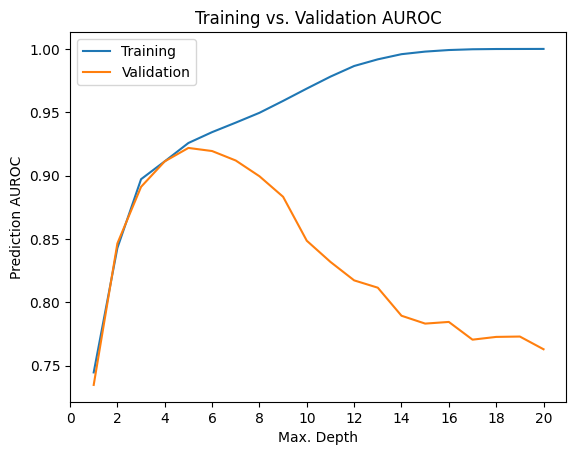

In [242]:
plt.figure()
plt.plot(aurocs_df['Max Depth'], aurocs_df['Training AUROC'])
plt.plot(aurocs_df['Max Depth'], aurocs_df['Validation AUROC'])
plt.title('Training vs. Validation AUROC')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction AUROC')
plt.legend(['Training', 'Validation'])

In [243]:
aurocs_df.loc[aurocs_df['Validation AUROC'].argmax()]

,4
Max Depth,5.000000
Training AUROC,0.925766
Validation AUROC,0.921864


Оптимальна глибина - 5.

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [244]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [245]:
from process_bank_churn import preprocess_new_data

In [247]:
test_raw_df = pd.read_csv("drive/MyDrive/ML course 2024/HW 2.2/test.csv")

In [248]:
preprocessed_test = preprocess_new_data(test_raw_df, input_cols, scaler, encoder, scale_numeric=False)

In [249]:
preprocessed_test.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15594796.0,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,0.0,1.0
1,15642821.0,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,0.0,1.0
2,15716284.0,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,0.0,1.0
3,15785078.0,717.0,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.0,0.0,1.0,0.0,1.0
4,15662955.0,592.0,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.0,0.0,1.0,0.0,1.0


In [258]:
# Передбачення на тестових даних
preds = model.predict(preprocessed_test)
submission_df = pd.read_csv("drive/MyDrive/ML course 2024/HW 2.2/sample_submission.csv")
submission_df['Exited'] = preds
submission_df.to_csv("submission.csv", index=False)
submission_df.head()


,id,Exited
0,15000,1.0
1,15001,1.0
2,15002,1.0
3,15003,1.0
4,15004,1.0
